In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import json_normalize
import glob


# Get all JSON files in the directory
file_paths = glob.glob(r'raw_data_rotterdam/*.json')

# Read and concatenate all JSON files
df_list = [pd.read_json(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

# Normalize the nested JSON data
df_normalized = json_normalize(df['data'])

In [28]:
# list of columns to keep
keep = ['navigation.time', 
        'navigation.location.long', 'navigation.location.lat', 
        'navigation.destination.name', 
        'navigation.destination.eta', 'navigation.status', 
        'device.mmsi', 
        'vessel.type', 
        'vessel.imo', 'vessel.name']

# filter the columns
df_keep = df_normalized[keep]

In [29]:
# convert the time to datetime
df_keep = df_keep.copy()
df_keep['navigation.time'] = pd.to_datetime(df_keep['navigation.time'])
df_keep['day'] = df_keep['navigation.time'].dt.day
df_keep['hour'] = df_keep['navigation.time'].dt.hour
df_keep['minute'] = df_keep['navigation.time'].dt.minute


In [30]:
df_keep['vessel.name'].value_counts()

vessel.name
TRUDIE            8909
JORDY-M           8906
CHARLOIS          8721
LEVANTE           8202
WESTERSCHELDE     7469
ROMEE             7198
JAN LEEGHWATER    7009
CAAN              7008
HELENA            6414
AARBURG           6339
ORION             1982
SUNMI             1128
MARIBO MAERSK      691
MAYVIEW MAERSK      25
CHARL                5
MKXTG C              2
8ELENA               1
JORDY CD1            1
"5FPV                1
MARIB                1
QE0>0                1
TRUDIH&'L            1
Name: count, dtype: int64

Removal of vessels with to little entries. Vessels with less than 10 are automatically deleted, a lot of them only have one entry to using them for some sort of time forecasting is not suitable. MAYIEW MAERSK has 25 entries, but all on same day, so for a similar reason it is removed

In [31]:
# remove vessel.name with less than 10 occurrences
df_keep = df_keep.groupby('vessel.name').filter(lambda x: len(x) > 10)

# for each vessel.name, create a new dataframe
df_vessels = {}
for vessel in df_keep['vessel.name'].unique():
    df_vessels[vessel] = df_keep[df_keep['vessel.name'] == vessel]

# drop MAYVIEW MAERSK from the dictionary
df_vessels.pop('MAYVIEW MAERSK')

# show the keys of the dictionary with their size
for key in df_vessels.keys():
    print(key, df_vessels[key].shape)

JAN LEEGHWATER (7009, 13)
AARBURG (6339, 13)
ORION (1982, 13)
LEVANTE (8202, 13)
JORDY-M (8906, 13)
HELENA (6414, 13)
CHARLOIS (8721, 13)
TRUDIE (8909, 13)
CAAN (7008, 13)
ROMEE (7198, 13)
WESTERSCHELDE (7469, 13)
SUNMI (1128, 13)
MARIBO MAERSK (691, 13)


Next, the time aspect of the vessels is checked

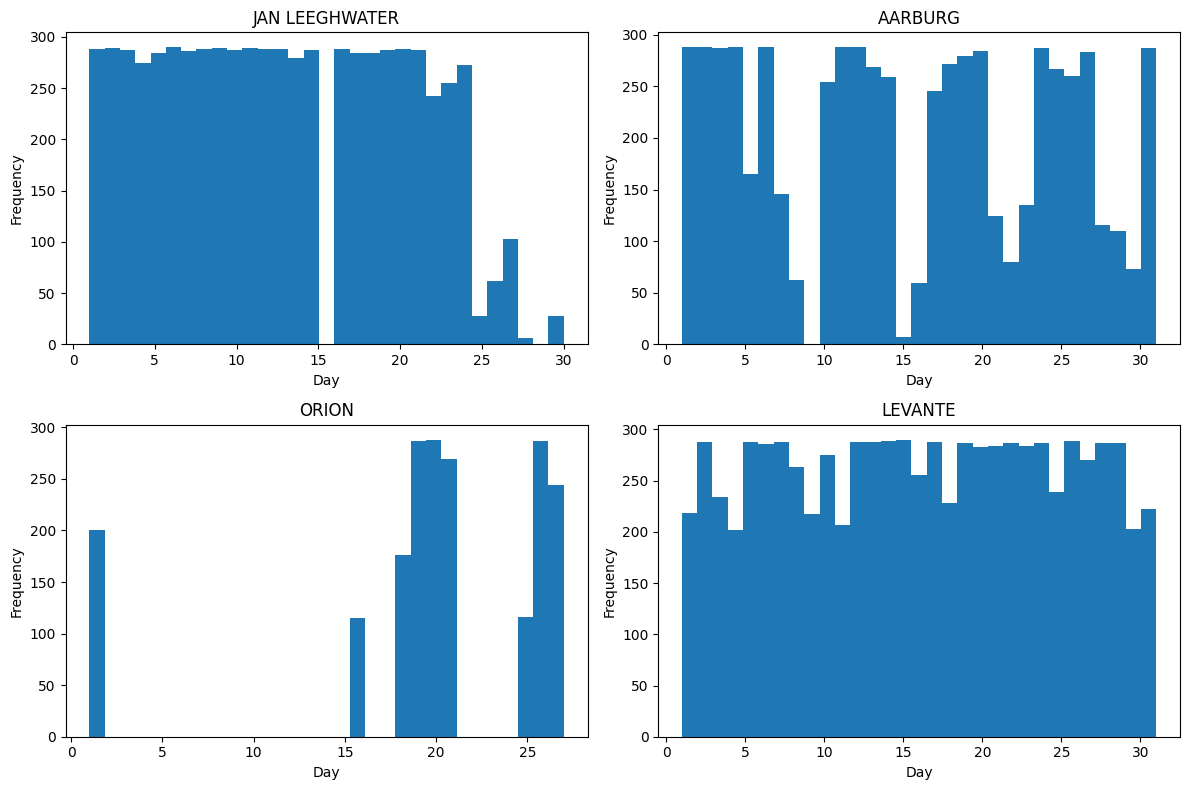

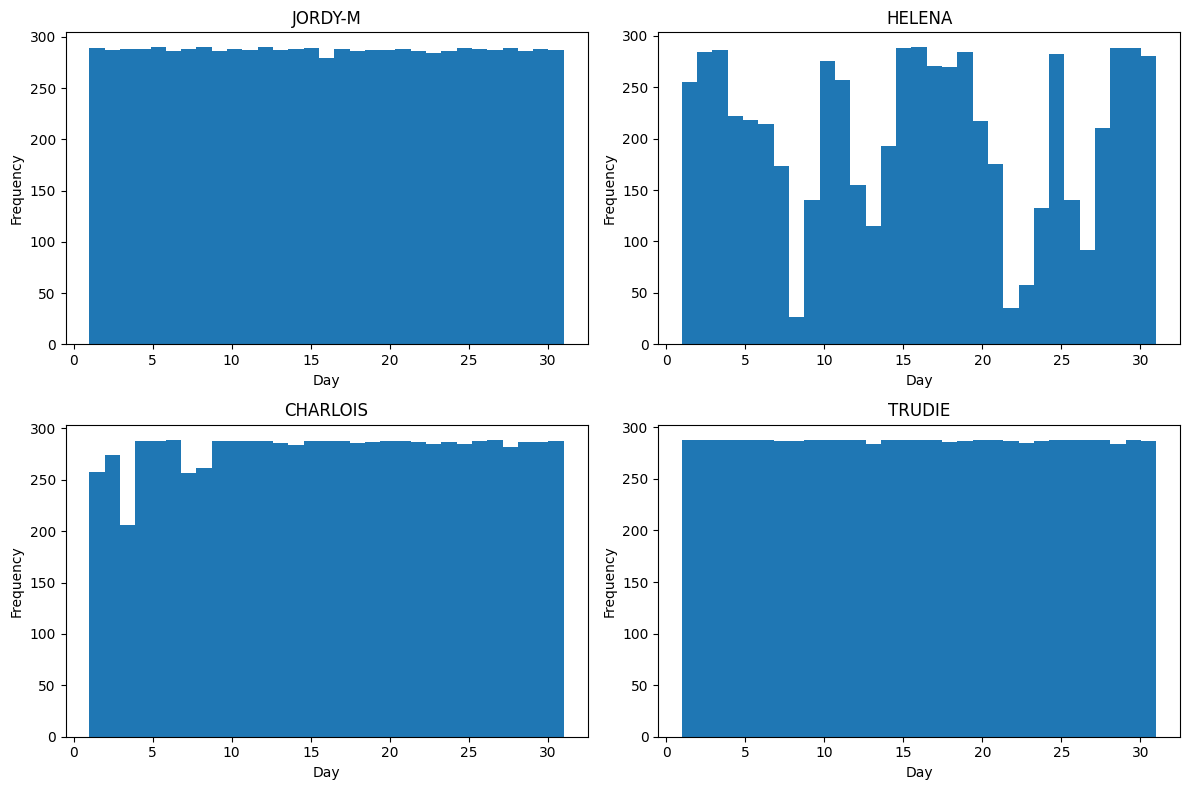

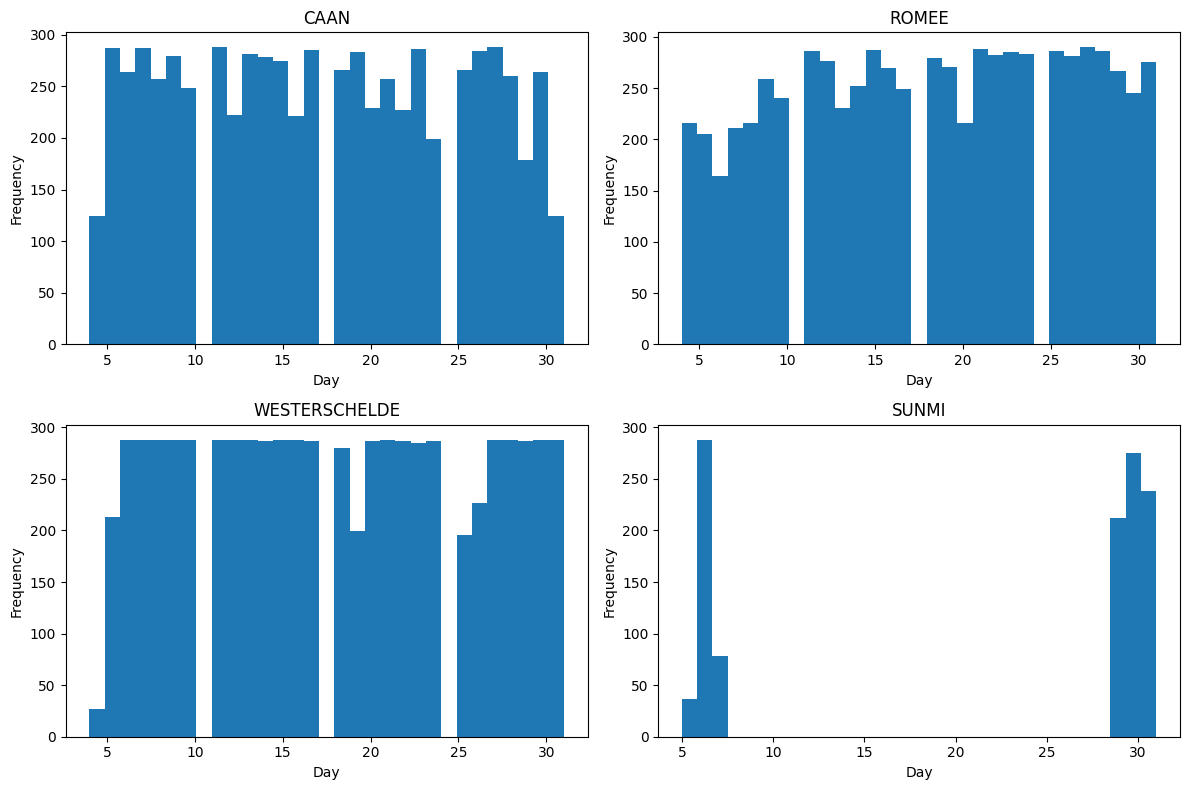

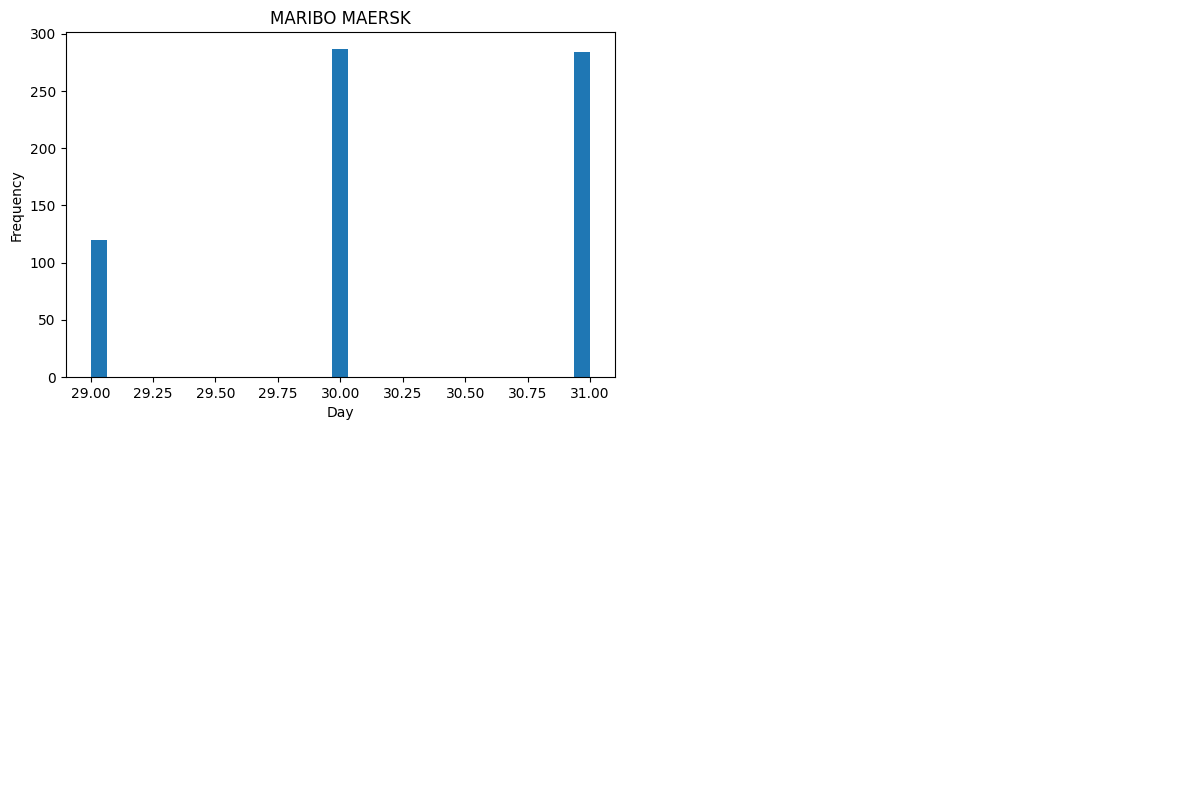

In [32]:
# Divide vessels into chunks of 4 and plot each chunk in a 2x2 grid
vessel_names = list(df_vessels.keys())
num_vessels = len(vessel_names)
vessels_per_plot = 4

for start in range(0, num_vessels, vessels_per_plot):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, key in enumerate(vessel_names[start:start + vessels_per_plot]):
        axes[i].hist(df_vessels[key]['day'], bins=31)
        axes[i].set_title(key)
        axes[i].set_xlabel('Day')
        axes[i].set_ylabel('Frequency')

    # Hide unused subplots
    for j in range(len(vessel_names[start:start + vessels_per_plot]), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


The histrograms show, that ORION, SUNMI and MARIBO MAERSK need to be further checked to see if the data is usable

In [33]:
!pip install basemap

  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl (7.7 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling matplotlib-3.9.2:
      Successfully uninstalled matplotlib-3.9.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
biogeme 3.2.14 requires matplotlib<4,>=3.9.0, but you have matplotlib 3.8.4 which is incompatible.
biogeme 3.2.14 requires numpy<3,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
biogeme-optimization 0.0.10 requires matplotlib<4,>=3.9.0, but you have matplotlib 3.8.4 which is incompatible.
biogeme-optimization 0.0.10 requires numpy<3,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [34]:
!pip install ipywidgets


In [37]:
pip install --user --upgrade --force-reinstall basemap basemap-data


  Using cached basemap-1.4.1-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached pyproj-3.6.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\dell\\appdata\\roaming\\python\\python312\\site-packages\\pyproj\\proj_dir\\share\\proj\\proj.db'
Check the permissions.



In [40]:
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.basemap import Basemap

# Create a dropdown widget for selecting a day
unique_days = sorted(df_keep['day'].unique())
day_dropdown = widgets.Dropdown(
    options=[('All Days', None)] + [(f'Day {day}', day) for day in unique_days],
    value=None,
    description='Day:',
)

# Function to update the map based on the selected day
def update_map(day):
    fig, ax = plt.subplots(figsize=(12, 12))
    m = Basemap(projection='merc', llcrnrlat=51.5, urcrnrlat=52.5,
                llcrnrlon=3.5, urcrnrlon=5.5, resolution='i', ax=ax)

    # Draw coastlines, countries, and map boundaries
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='lightgray', lake_color='aqua')

    # Plot the datapoints for the selected vessels
    for key in ['ORION', 'SUNMI', 'MARIBO MAERSK']:
        vessel_data = df_vessels[key]
        if day is not None:
            vessel_data = vessel_data[vessel_data['day'] == day]
        x, y = m(vessel_data['navigation.location.long'].values,
                 vessel_data['navigation.location.lat'].values)
        ax.scatter(x, y, label=key)

    ax.legend()
    plt.show()

# Link the dropdown to the update_map function
interactive_plot = widgets.interactive(update_map, day=day_dropdown)

# Display the dropdown and the interactive plot
display(day_dropdown, interactive_plot)


Dropdown(description='Day:', options=(('All Days', None), ('Day 1', 1), ('Day 2', 2), ('Day 3', 3), ('Day 4', …

interactive(children=(Dropdown(description='Day:', options=(('All Days', None), ('Day 1', 1), ('Day 2', 2), ('…

The data points seem to be really inconsistent and will therefore be exlucded from the dataframe first. Maybe a run with these datapoints included could be made. But for now the "smoother" vessels will only be included

Next step is to filter the data on locations. For example to exclude a vessel which is not moving at all

In [41]:
# Create a dropdown widget for selecting a vessel
vessel_dropdown = widgets.Dropdown(
    options=[(name, name) for name in df_vessels.keys()],
    value=list(df_vessels.keys())[0],
    description='Vessel:',
)

# Function to update the map based on the selected vessel
def update_vessel_map(vessel_name):
    fig, ax = plt.subplots(figsize=(16, 16))  # Increased the figure size
    m = Basemap(projection='merc', llcrnrlat=49.0, urcrnrlat=54.0,
                llcrnrlon=3.0, urcrnrlon=9.5, resolution='i', ax=ax)

    # Draw coastlines, countries, and map boundaries
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='lightgray', lake_color='aqua')

    # Plot the datapoints for the selected vessel
    vessel_data = df_vessels[vessel_name]
    x, y = m(vessel_data['navigation.location.long'].values,
             vessel_data['navigation.location.lat'].values)
    ax.scatter(x, y, label=vessel_name, color='red')

    ax.legend()
    plt.show()

# Link the dropdown to the update_vessel_map function
interactive_vessel_plot = widgets.interactive(update_vessel_map, vessel_name=vessel_dropdown)

# Display the dropdown and the interactive plot
display(vessel_dropdown, interactive_vessel_plot)

Dropdown(description='Vessel:', options=(('JAN LEEGHWATER', 'JAN LEEGHWATER'), ('AARBURG', 'AARBURG'), ('ORION…

interactive(children=(Dropdown(description='Vessel:', options=(('JAN LEEGHWATER', 'JAN LEEGHWATER'), ('AARBURG…

It might be necessary to exclude Helena from the dataset as a lot of the coordinates arent in the area of the port of rotterdam and thus put a unproportionally high focus on the hinterland route.
Same goes for Aarburg. I propose a dataset which is solely focused on the port of rotterdam area and one bigger one and try both.
Jan Leeghwater could be excluded as there is no movement at all and thus it should not have impact on other areas. At least in the time period we are looking at.

In [42]:
# ---- Create resulting dataframes ----

# A: strict dataframe for rotterdam port area = vessels which have data for this area
vessels_slim_rotterdam = ['AARBURG', 'LEVANTE', 'JORDY-M', 'CHARLOIS', 'TRUDIE', 'CAAN', 'ROMEE', 'WESTERSCHELDE']
df_slim_rotterdam = pd.concat([df_vessels[vessel] for vessel in vessels_slim_rotterdam])

# only coordinates in this area 
df_slim_rotterdam = df_slim_rotterdam[(df_slim_rotterdam['navigation.location.lat'] > 51.8) & 
                                      (df_slim_rotterdam['navigation.location.lat'] < 52.0) & 
                                      (df_slim_rotterdam['navigation.location.long'] > 4.0) & 
                                      (df_slim_rotterdam['navigation.location.long'] < 4.6)]

# B: strict dataframe for rotterdam area with additionally ORION, SUNMI, MARIBO MAERSK
vessels_wide_rotterdam = ['AARBURG', 'LEVANTE', 'JORDY-M', 'CHARLOIS', 'TRUDIE', 'CAAN', 'ROMEE', 'WESTERSCHELDE', 'ORION', 'SUNMI', 'MARIBO MAERSK']
df_wide_rotterdam = pd.concat([df_vessels[vessel] for vessel in vessels_wide_rotterdam])

# only coordinates in this area
df_wide_rotterdam = df_wide_rotterdam[(df_wide_rotterdam['navigation.location.lat'] > 51.8) & 
                                      (df_wide_rotterdam['navigation.location.lat'] < 52.0) & 
                                      (df_wide_rotterdam['navigation.location.long'] > 4.0) & 
                                      (df_wide_rotterdam['navigation.location.long'] < 4.6)]


# C: dataframes with all moving vessels, only exclude points below frankfurt as they are disconnected from the rest
vessels_all = vessels_wide_rotterdam + ['HELENA']     # so all vessels except JAN LEEGHWATER
df_all = pd.concat([df_vessels[vessel] for vessel in vessels_all])

# remove datapoints below frankfurt
df_all = df_all[df_all['navigation.location.lat'] > 50.5]


df_slim_rotterdam.describe()




,navigation.location.long,navigation.location.lat,device.mmsi,vessel.imo,day,hour,minute
count,30043.000000,30043.000000,3.004300e+04,30043.0,30043.000000,30043.000000,30043.000000
mean,4.201717,51.918206,2.413457e+08,0.0,15.901341,11.412642,28.825017
std,0.178552,0.039834,9.788899e+06,0.0,8.605918,6.844214,17.265774
min,4.000020,51.805470,2.115602e+08,0.0,1.000000,0.000000,0.000000
25%,4.032980,51.881020,2.446300e+08,0.0,8.000000,6.000000,15.000000
50%,4.169250,51.930500,2.446307e+08,0.0,16.000000,11.000000,30.000000
75%,4.376845,51.957740,2.447008e+08,0.0,23.000000,17.000000,45.000000
max,4.599940,51.979860,2.447500e+08,0.0,31.000000,23.000000,59.000000


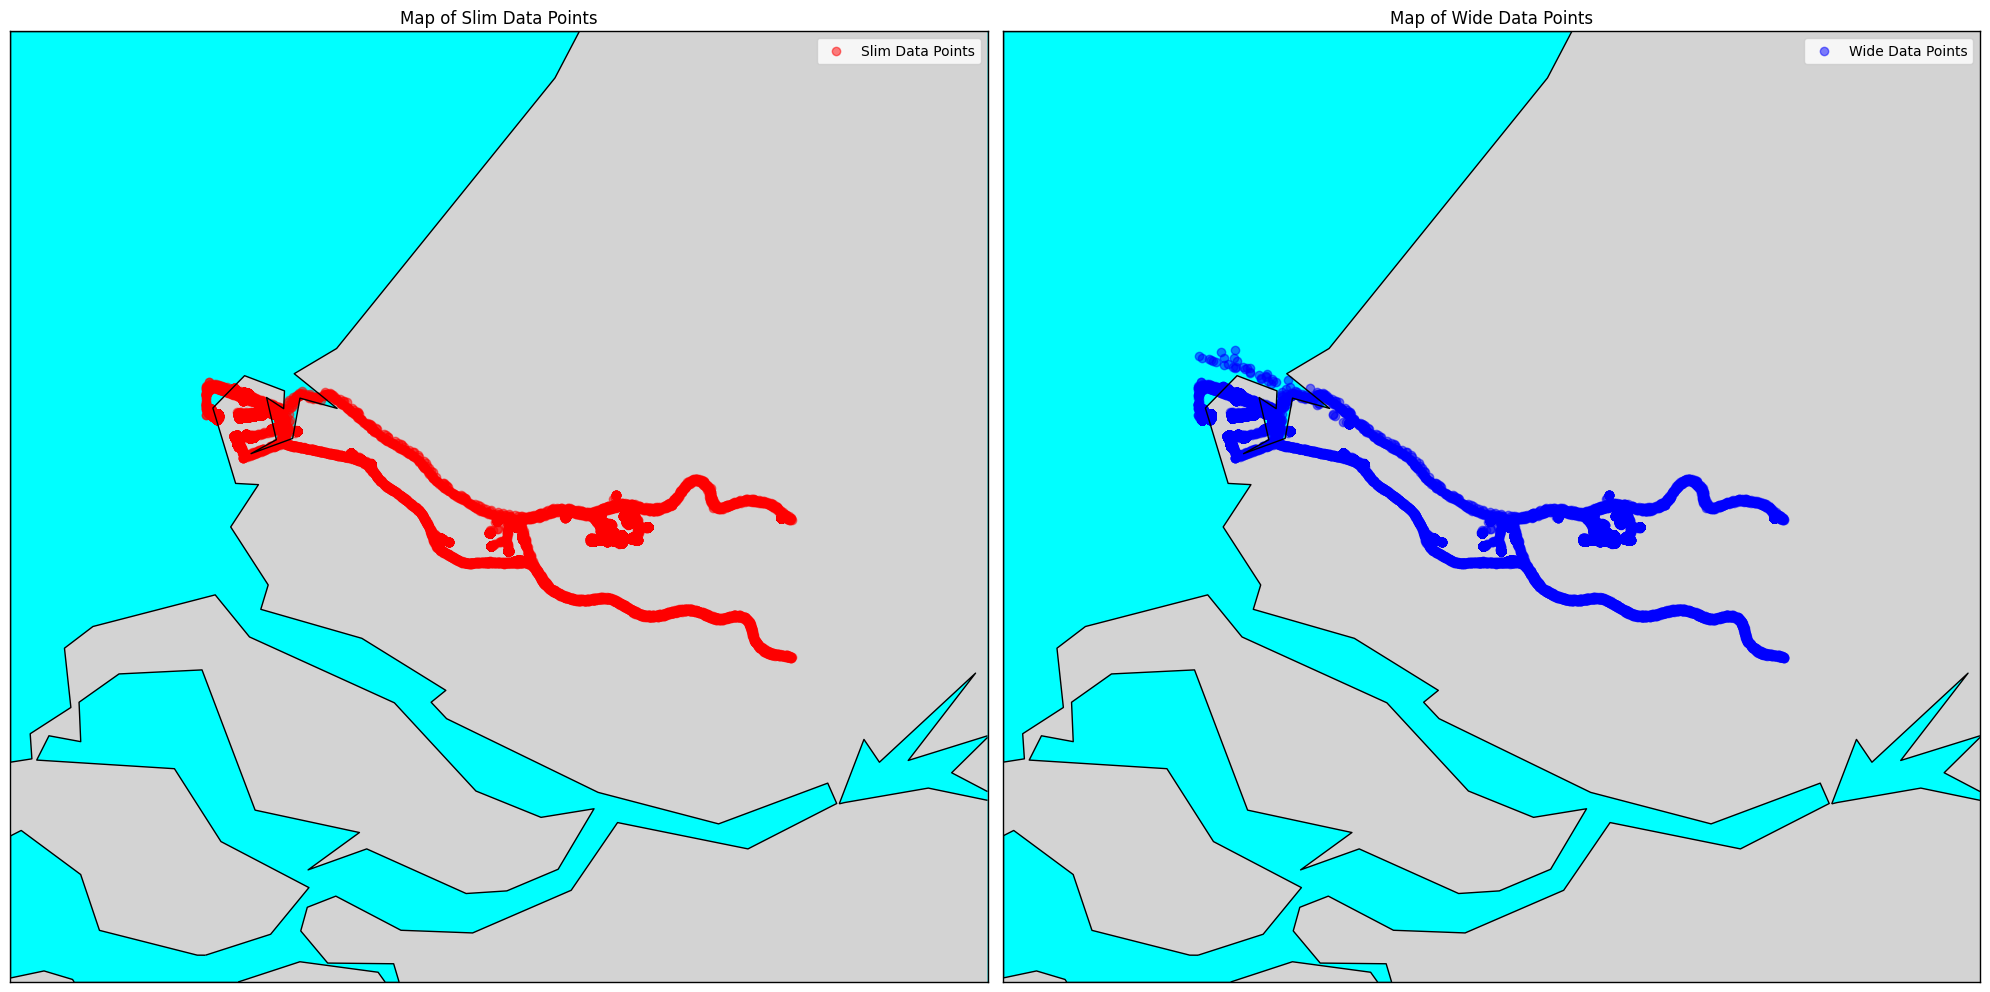

In [43]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# First subplot: Map with datapoints from df_slim_rotterdam
m1 = Basemap(projection='merc', llcrnrlat=51.6, urcrnrlat=52.2,
             llcrnrlon=3.8, urcrnrlon=4.8, resolution='i', ax=axes[0])

# Draw coastlines, countries, and map boundaries
m1.drawcoastlines()
m1.drawcountries()
m1.drawmapboundary(fill_color='aqua')
m1.fillcontinents(color='lightgray', lake_color='aqua')

# Plot the datapoints from df_slim_rotterdam
x_slim, y_slim = m1(df_slim_rotterdam['navigation.location.long'].values,
                    df_slim_rotterdam['navigation.location.lat'].values)
axes[0].scatter(x_slim, y_slim, marker='o', color='red', alpha=0.5, label='Slim Data Points')

axes[0].legend()
axes[0].set_title('Map of Slim Data Points')

# Second subplot: Map with datapoints from df_wide_rotterdam
m2 = Basemap(projection='merc', llcrnrlat=51.6, urcrnrlat=52.2,
             llcrnrlon=3.8, urcrnrlon=4.8, resolution='i', ax=axes[1])

# Draw coastlines, countries, and map boundaries
m2.drawcoastlines()
m2.drawcountries()
m2.drawmapboundary(fill_color='aqua')
m2.fillcontinents(color='lightgray', lake_color='aqua')

# Plot the datapoints from df_wide_rotterdam
x_wide, y_wide = m2(df_wide_rotterdam['navigation.location.long'].values,
                    df_wide_rotterdam['navigation.location.lat'].values)
axes[1].scatter(x_wide, y_wide, marker='o', color='blue', alpha=0.5, label='Wide Data Points')

axes[1].legend()
axes[1].set_title('Map of Wide Data Points')

plt.tight_layout()
plt.show()

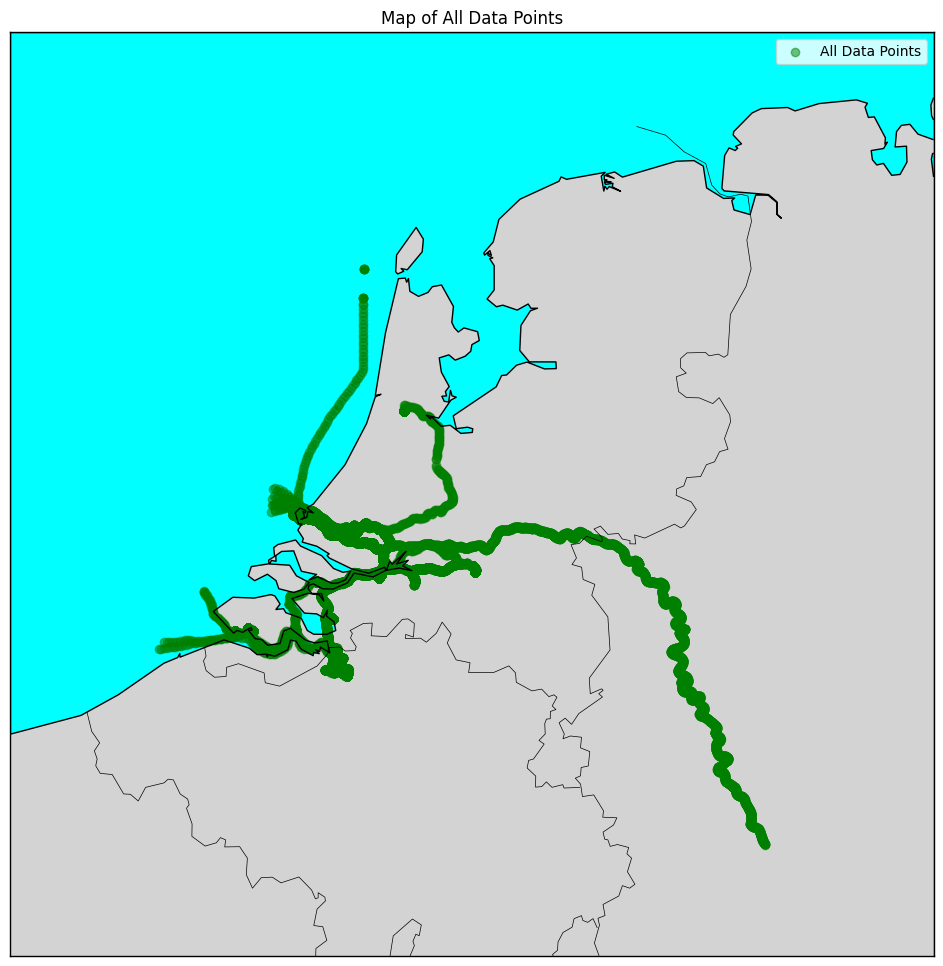

In [44]:
# Create a map to plot datapoints from df_all
fig, ax = plt.subplots(figsize=(12, 12))

# Initialize the Basemap
m3 = Basemap(projection='merc', llcrnrlat=50.0, urcrnrlat=54.0,
             llcrnrlon=2.0, urcrnrlon=8.5, resolution='i', ax=ax)

# Draw coastlines, countries, and map boundaries
m3.drawcoastlines()
m3.drawcountries()
m3.drawmapboundary(fill_color='aqua')
m3.fillcontinents(color='lightgray', lake_color='aqua')

# Plot the datapoints from df_all
x_all, y_all = m3(df_all['navigation.location.long'].values,
                  df_all['navigation.location.lat'].values)
ax.scatter(x_all, y_all, marker='o', color='green', alpha=0.5, label='All Data Points')

ax.legend()
ax.set_title('Map of All Data Points')

plt.show()

In [45]:
# save df_wide and df_slim to json
df_wide_rotterdam.to_json('df_wide_rotterdam.json', orient='records')
df_slim_rotterdam.to_json('df_slim_rotterdam.json', orient='records')

## Clustering

In [46]:
df_wide_rotterdam

,navigation.time,navigation.location.long,navigation.location.lat,navigation.destination.name,navigation.destination.eta,navigation.status,device.mmsi,vessel.type,vessel.imo,vessel.name,day,hour,minute
101,2021-01-01 00:06:28+00:00,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,6
102,2021-01-01 00:09:29+00:00,4.00827,51.95786,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,9
103,2021-01-01 00:12:28+00:00,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,12
104,2021-01-01 00:12:28+00:00,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,12
105,2021-01-01 00:24:29+00:00,4.00828,51.95786,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77532,2021-01-31 23:34:56+00:00,4.00367,51.95580,EGSUC>NLROT,2021-01-29T12:30:00+00:00,moored,219019094,cargo,9619969,MARIBO MAERSK,31,23,34
77533,2021-01-31 23:40:57+00:00,4.00390,51.95580,EGSUC>NLROT,2021-01-29T12:30:00+00:00,moored,219019094,cargo,9619969,MARIBO MAERSK,31,23,40
77534,2021-01-31 23:46:57+00:00,4.00390,51.95580,EGSUC>NLROT,2021-01-29T12:30:00+00:00,moored,219019094,cargo,9619969,MARIBO MAERSK,31,23,46
77535,2021-01-31 23:49:57+00:00,4.00390,51.95580,EGSUC>NLROT,2021-01-29T12:30:00+00:00,moored,219019094,cargo,9619969,MARIBO MAERSK,31,23,49


In [47]:
df_slim_rotterdam

,navigation.time,navigation.location.long,navigation.location.lat,navigation.destination.name,navigation.destination.eta,navigation.status,device.mmsi,vessel.type,vessel.imo,vessel.name,day,hour,minute
101,2021-01-01 00:06:28+00:00,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,6
102,2021-01-01 00:09:29+00:00,4.00827,51.95786,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,9
103,2021-01-01 00:12:28+00:00,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,12
104,2021-01-01 00:12:28+00:00,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,12
105,2021-01-01 00:24:29+00:00,4.00828,51.95786,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73415,2021-01-29 17:16:58+00:00,4.51208,51.83224,RDAM-BERGEN OP ZOOM,None,under-way-using-engine,244670295,other,0,ROMEE,29,17,16
73416,2021-01-29 17:21:59+00:00,4.53372,51.83036,RDAM-BERGEN OP ZOOM,None,under-way-using-engine,244670295,other,0,ROMEE,29,17,21
73417,2021-01-29 17:26:59+00:00,4.55464,51.82853,RDAM-BERGEN OP ZOOM,None,under-way-using-engine,244670295,other,0,ROMEE,29,17,26
73418,2021-01-29 17:32:00+00:00,4.56225,51.81571,RDAM-BERGEN OP ZOOM,None,under-way-using-engine,244670295,other,0,ROMEE,29,17,32


In [48]:
!pip install scikit-learn


In [49]:
from sklearn.preprocessing import StandardScaler

df_numeric = df_wide_rotterdam[['navigation.location.long', 'navigation.location.lat', 'device.mmsi', 'vessel.imo', 'day', 'hour', 'minute']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)                                                    

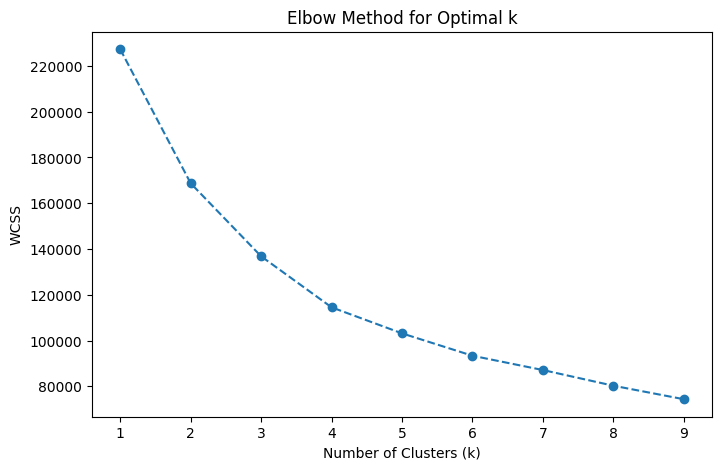

In [50]:
from sklearn.cluster import KMeans
wcss = []  # Within-cluster sum of squares
N_max = 10

for k in range(1, N_max):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, N_max), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [55]:
optimal_k = 3  # Choose based on the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_wide_rotterdam['cluster'] = kmeans.fit_predict(df_scaled)


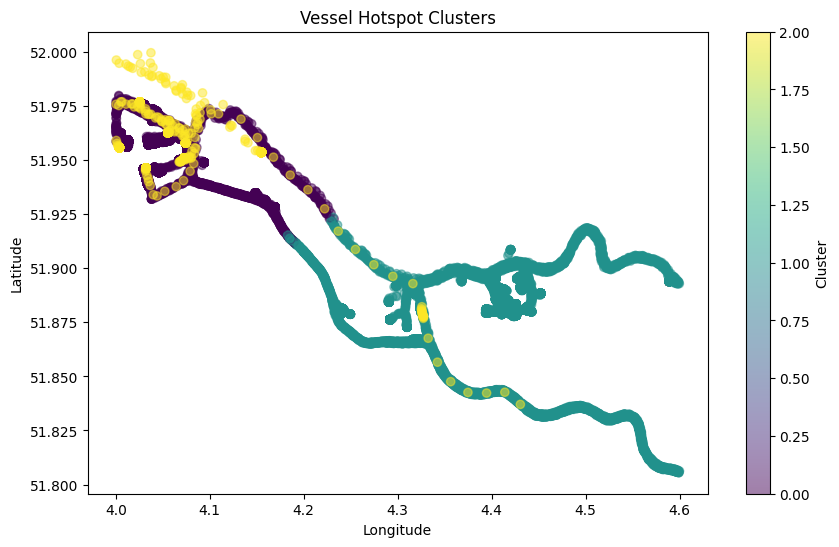

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(df_wide_rotterdam['navigation.location.long'], df_wide_rotterdam['navigation.location.lat'], 
            c=df_wide_rotterdam['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vessel Hotspot Clusters')
plt.colorbar(label='Cluster')
plt.show()


## clustering 2


In [57]:
# Extract coordinates
coords = df_wide_rotterdam[['navigation.location.long', 'navigation.location.lat']]

# Standardize the coordinates for better clustering
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

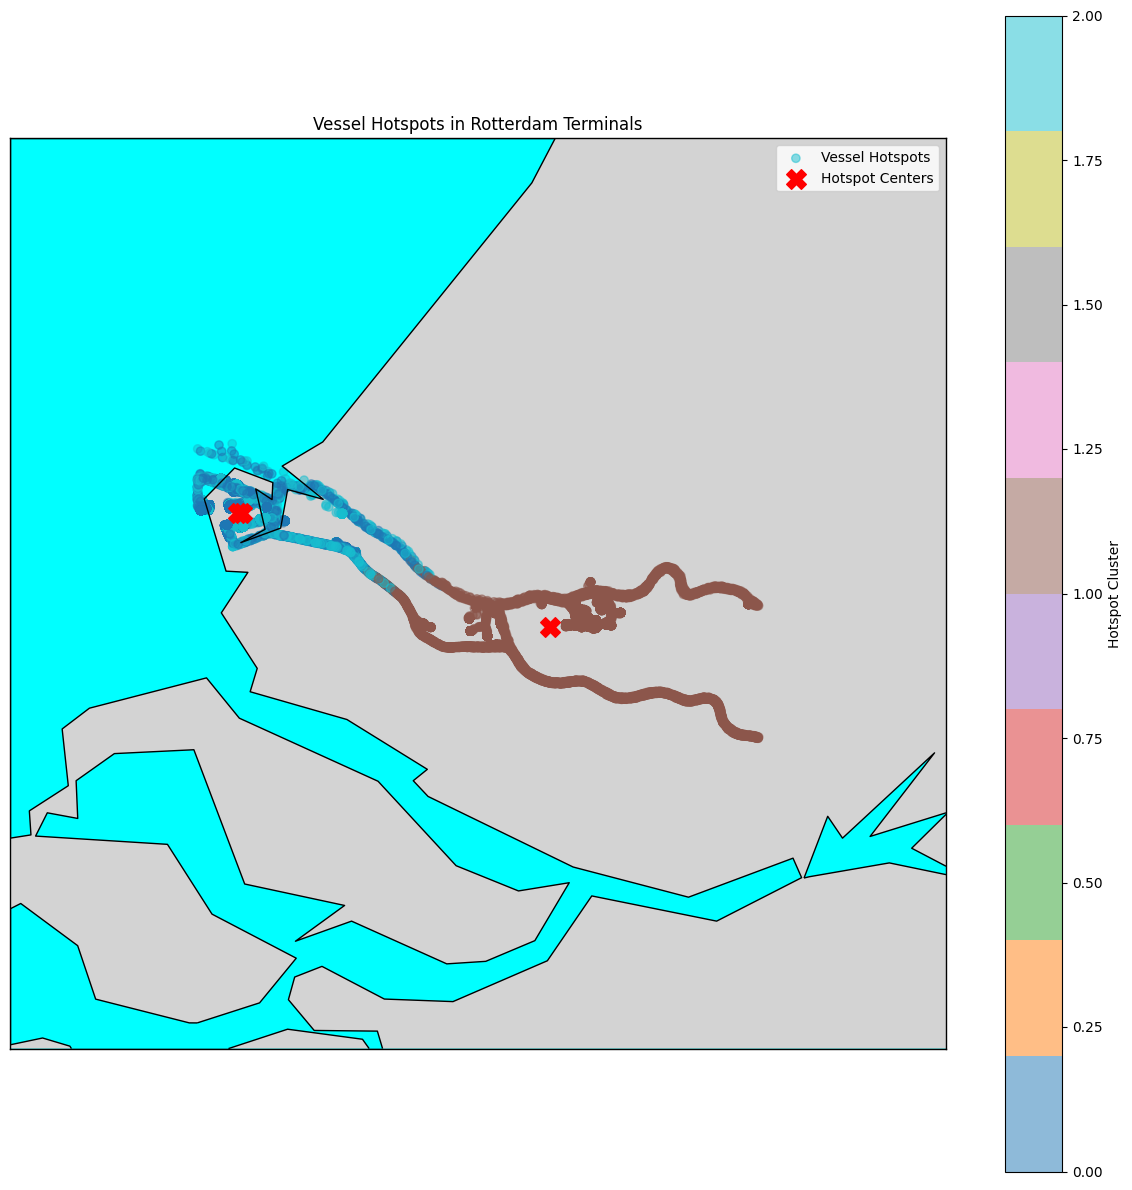

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant columns (spatial + temporal features for better clustering)
features = ['navigation.location.long', 'navigation.location.lat', 'hour', 'minute']
df_numeric = df_wide_rotterdam[features]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Choose optimal k using the Elbow method (manually set for now)
optimal_k = 3  # Adjust this after checking the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_wide_rotterdam['hotspot_cluster'] = kmeans.fit_predict(df_scaled)

# Get cluster centers (scaled back to original coordinates)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the hotspots on the Rotterdam map
fig, ax = plt.subplots(figsize=(12, 12))
m = Basemap(projection='merc', llcrnrlat=51.6, urcrnrlat=52.2,
            llcrnrlon=3.8, urcrnrlon=4.8, resolution='i', ax=ax)

# Draw base map
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert vessel locations for plotting
x_vessel, y_vessel = m(df_wide_rotterdam['navigation.location.long'].values,
                        df_wide_rotterdam['navigation.location.lat'].values)

# Convert cluster centers (hotspots)
x_centers, y_centers = m(cluster_centers[:, 0], cluster_centers[:, 1])

# Scatter plot for vessel data, colored by cluster
scatter = ax.scatter(x_vessel, y_vessel, c=df_wide_rotterdam['hotspot_cluster'], 
                      cmap='tab10', marker='o', alpha=0.5, label='Vessel Hotspots')

# Scatter plot for cluster centers (hotspot locations)
ax.scatter(x_centers, y_centers, marker='X', color='red', s=200, label='Hotspot Centers')

ax.legend()
ax.set_title('Vessel Hotspots in Rotterdam Terminals')

# Add colorbar to show different clusters
plt.colorbar(scatter, label='Hotspot Cluster')

plt.tight_layout()
plt.show()


Cluster centers (hotspots):
 [[ 4.03899768 51.95538148]
 [ 4.44217018 51.87763803]
 [ 4.28561514 51.88581059]]
Total Error (Inertia): 67.7985535563081


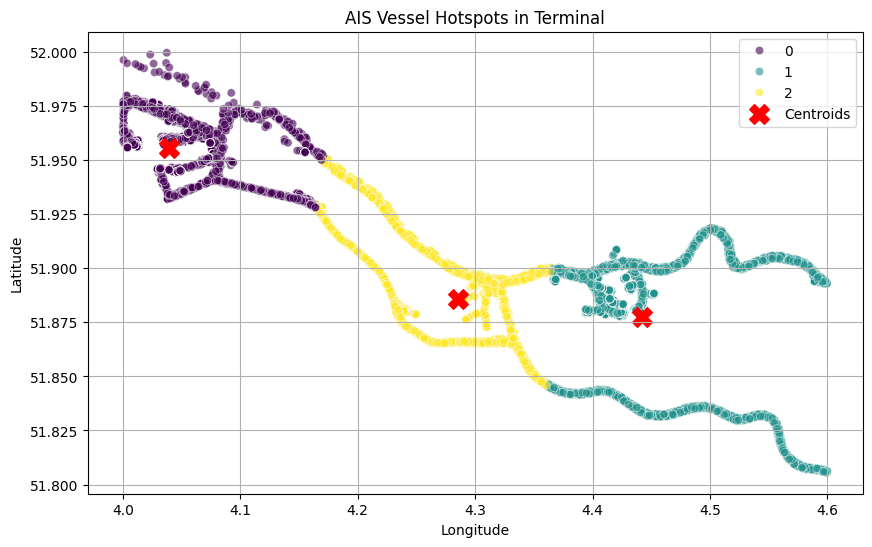

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Extract relevant features: Longitude & Latitude for clustering
X = df_wide_rotterdam[['navigation.location.long', 'navigation.location.lat']].dropna()

# Define the number of clusters (hotspots)
k = 3  # Adjust based on data analysis

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
kmeans.fit(X)

# Assign cluster labels to the original dataset
df_wide_rotterdam['hotspot_cluster'] = kmeans.labels_

# Print cluster summary
print("Cluster centers (hotspots):\n", kmeans.cluster_centers_)
print("Total Error (Inertia):", kmeans.inertia_)

# Plot hotspots
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_wide_rotterdam['navigation.location.long'],
    y=df_wide_rotterdam['navigation.location.lat'],
    hue=df_wide_rotterdam['hotspot_cluster'],
    palette="viridis",
    alpha=0.6
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label="Centroids")  # Mark centroids
plt.title("AIS Vessel Hotspots in Terminal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


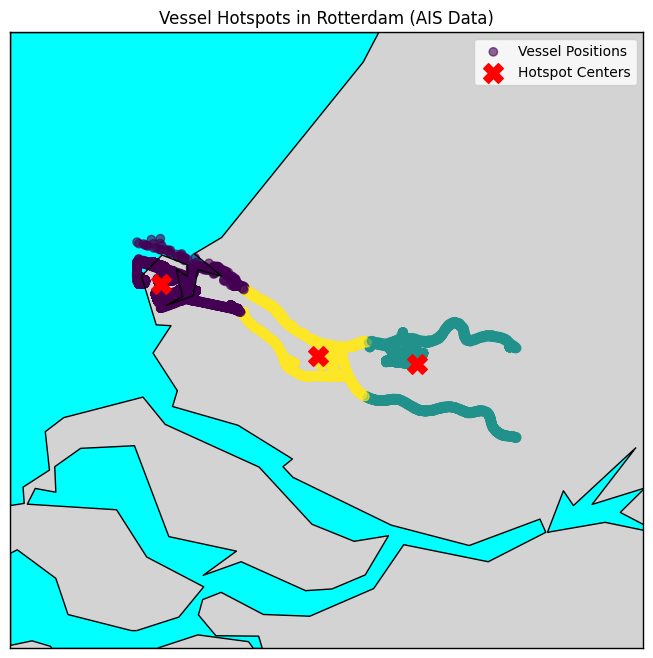

In [65]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

# Extract relevant coordinates
X = df_wide_rotterdam[['navigation.location.long', 'navigation.location.lat']].dropna()

# Define the number of clusters (hotspots)
k = 3  # Adjust based on Elbow Method if needed

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
kmeans.fit(X)

# Assign cluster labels to the dataset
df_wide_rotterdam['hotspot_cluster'] = kmeans.labels_

# Set up the Basemap plot
fig, ax = plt.subplots(figsize=(10, 8))
m2 = Basemap(projection='merc', llcrnrlat=51.6, urcrnrlat=52.2,
             llcrnrlon=3.8, urcrnrlon=4.8, resolution='i', ax=ax)

# Draw coastlines, countries, and map features
m2.drawcoastlines()
m2.drawcountries()
m2.drawmapboundary(fill_color='aqua')
m2.fillcontinents(color='lightgray', lake_color='aqua')

# Convert vessel coordinates to Basemap projection
x_wide, y_wide = m2(df_wide_rotterdam['navigation.location.long'].values,
                     df_wide_rotterdam['navigation.location.lat'].values)

# Convert cluster centroids to Basemap projection
x_centroids, y_centroids = m2(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

# Scatter plot for vessel locations with cluster colors
scatter = ax.scatter(x_wide, y_wide, c=df_wide_rotterdam['hotspot_cluster'], 
                     cmap='viridis', alpha=0.6, label='Vessel Positions')

# Mark centroids with red 'X'
ax.scatter(x_centroids, y_centroids, marker='X', c='red', s=200, label="Hotspot Centers")

# Add a legend and title
ax.legend()
ax.set_title('Vessel Hotspots in Rotterdam (AIS Data)')

# Show the plot
plt.show()
